In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# This DS is collected  from power consumption of three different distribution networks of Tetouan in  Morocco.
# The DS is multivariate time series data.
# Source of the DS : https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city

In [3]:
df = pd.read_csv('Tetuan City power consumption.csv')
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.shape

(52416, 9)

In [5]:
df.info()
# The good thing is there all columns are numerical except the date column.
# So I don't have to do any encoding.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
# let's check for duplicated values
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()
# It seems there are some columns have skewed distribution

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [8]:
# I nned to fix the columns name to remove the spaces
df.columns = df.columns.str.replace(' ', '_')
df.head()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [9]:
df.tail()
# This is one year data 

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


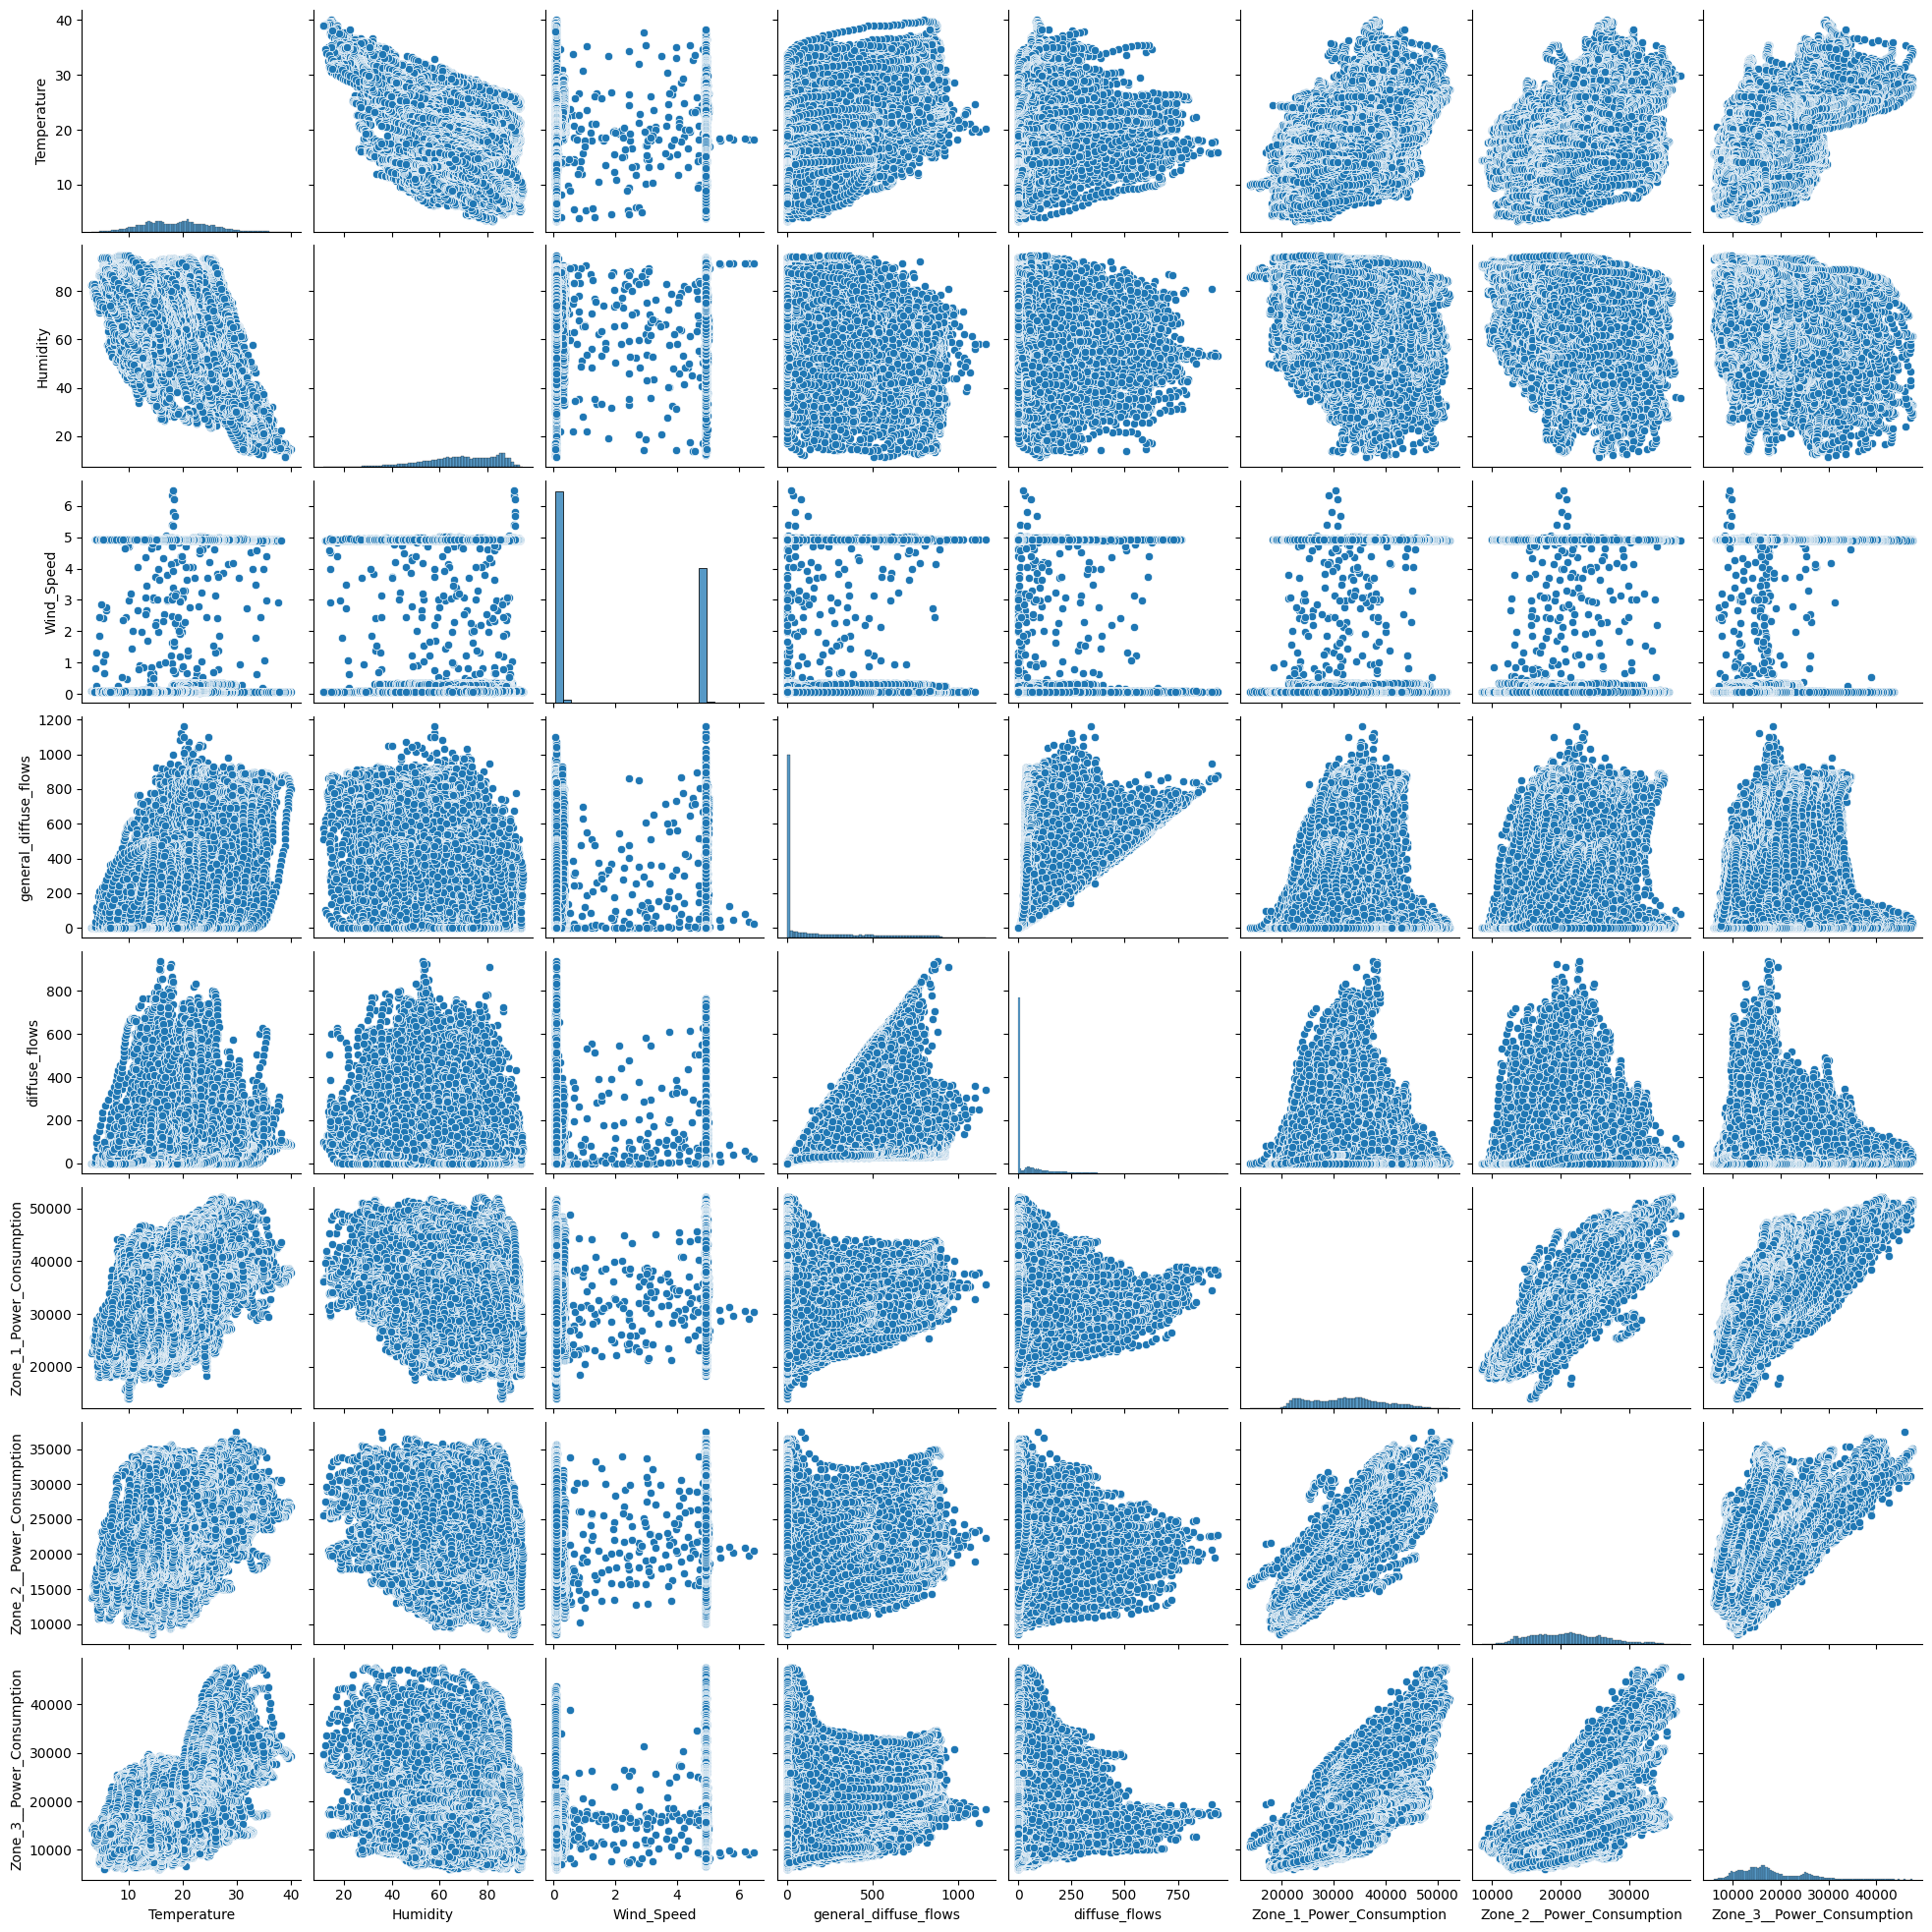

In [10]:
# Let's visualize the distribution of the columns
sns.pairplot(df)

In [11]:
# Let's convert the date column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime']) 
df = df.sort_values('DateTime').set_index('DateTime')
df_hourly = df.resample('h').mean(numeric_only=True)

In [12]:
df.duplicated().sum()

np.int64(0)

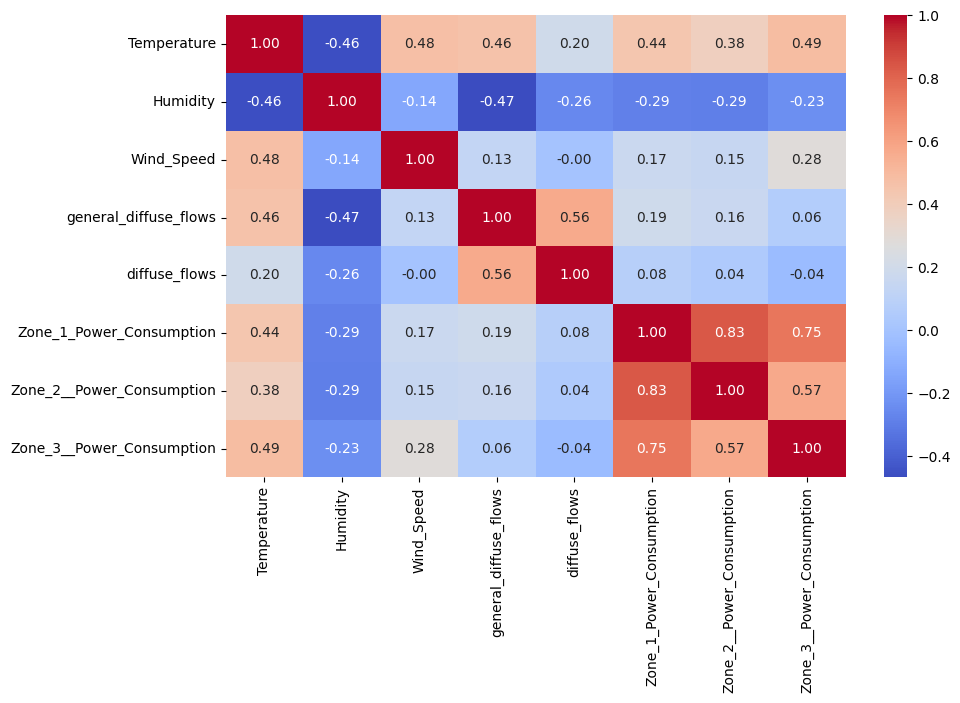

In [13]:
# Let's visualize the coorrelation between the columns
numeric_columns = df.select_dtypes(include=[np.number])
corr = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
# Zone1,2 and 3 are strongly correlated.
# HUmidity and Temperature have inverse connection.

In [14]:
# let's check the NaN values
df_hourly.isna().sum()

Temperature                  0
Humidity                     0
Wind_Speed                   0
general_diffuse_flows        0
diffuse_flows                0
Zone_1_Power_Consumption     0
Zone_2__Power_Consumption    0
Zone_3__Power_Consumption    0
dtype: int64

In [15]:
df_hourly.shape

(8736, 8)

In [16]:
df_hourly.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


In [17]:
df_hourly["hour"] = df_hourly.index.hour
df_hourly.head() 

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption,hour
DateTime,,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193,0
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567,1
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578,2
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422,3
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433,4


In [18]:
#  I need to round the values to 2 decimal points
df_hourly = df_hourly.round(2)

In [19]:
df_hourly.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption,hour
DateTime,,,,,,,,,
2017-01-01 00:00:00,6.20,75.07,0.08,0.06,0.10,29197.97,18026.75,19252.05,0
2017-01-01 01:00:00,5.55,77.58,0.08,0.06,0.11,24657.22,16078.42,17042.89,1
2017-01-01 02:00:00,5.05,78.93,0.08,0.06,0.13,22083.04,14330.70,15676.14,2
2017-01-01 03:00:00,5.00,77.08,0.08,0.06,0.14,20811.14,13219.45,14883.86,3
2017-01-01 04:00:00,5.10,74.05,0.08,0.06,0.12,20475.95,12921.58,14317.11,4


In [20]:
# Change the target columns's name 
df_hourly.rename(columns={'Zone_1_Power_Consumption': 'zone_one','Zone_2__Power_Consumption': 'zone_two',  'Zone_3__Power_Consumption': 'zone_three'}, inplace=True)

In [ ]:
# Time Cyclical Encoding
df_hourly['hour_sin'] = np.sin(2*np.pi*df_hourly['hour']/24)
df_hourly['hour_cos'] = np.cos(2*np.pi*df_hourly['hour']/24)

# Source: https://towardsdatascience.com/cyclical-encoding-an-alternative-to-one-hot-encoding-for-time-series-features-4db46248ebba

KeyError: 'hour'

In [22]:
df_hourly = df_hourly.drop(columns=['hour'])

In [23]:
df_hourly.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,zone_one,zone_two,zone_three,hour_sin,hour_cos
DateTime,,,,,,,,,,
2017-01-01 00:00:00,6.20,75.07,0.08,0.06,0.10,29197.97,18026.75,19252.05,0.000000,1.000000
2017-01-01 01:00:00,5.55,77.58,0.08,0.06,0.11,24657.22,16078.42,17042.89,0.258819,0.965926
2017-01-01 02:00:00,5.05,78.93,0.08,0.06,0.13,22083.04,14330.70,15676.14,0.500000,0.866025
2017-01-01 03:00:00,5.00,77.08,0.08,0.06,0.14,20811.14,13219.45,14883.86,0.707107,0.707107
2017-01-01 04:00:00,5.10,74.05,0.08,0.06,0.12,20475.95,12921.58,14317.11,0.866025,0.500000


In [25]:
df_hourly.describe()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,zone_one,zone_two,zone_three,hour_sin,hour_cos
count,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8.736000e+03,8.736000e+03
mean,18.810064,68.259460,1.959277,182.696674,75.028016,32344.970545,21042.509083,17835.406229,-1.830038e-17,-5.540948e-17
std,5.807578,15.475737,2.340826,260.820260,119.691933,7068.919891,5165.178217,6591.014061,7.071473e-01,7.071473e-01
min,3.600000,12.710000,0.050000,0.020000,0.040000,14329.110000,8685.950000,6190.640000,-1.000000e+00,-1.000000e+00
25%,14.400000,58.320000,0.080000,0.060000,0.120000,26292.952500,17016.902500,13148.470000,-7.071068e-01,-7.071068e-01
50%,18.760000,69.820000,0.090000,9.950000,8.240000,32342.305000,20787.230000,16427.660000,6.123234e-17,-6.123234e-17
75%,22.870000,81.350000,4.920000,326.485000,105.880000,37318.002500,24677.610000,21598.450000,7.071068e-01,7.071068e-01
max,39.700000,94.750000,5.930000,953.350000,861.000000,51844.260000,36254.700000,47223.770000,1.000000e+00,1.000000e+00


In [24]:
# Save the preprocessed data
df_hourly.to_csv('preprocessed_hourly.csv', index=True)